In [6]:
# FIXME:第二部分：关联性分析与可视化
# FIXME:探索特征间的关系

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('used_car_train_20200313.csv', sep=' ')
# 设置中文字体，防止图表中的中文乱码
plt.rcParams['font.sans-serif'] = ['Microsoft YaHei']
plt.rcParams['axes.unicode_minus'] = False # 正常显示负号

In [7]:
df['regDate'] = pd.to_datetime(df['regDate'], format='%Y%m%d', errors='coerce')
df['creatDate'] = pd.to_datetime(df['creatDate'], format='%Y%m%d', errors='coerce')
df['car_age'] = (df['creatDate'] - df['regDate']).dt.days / 365

# TODO 1.数值特征与价格的关系
# --- 1. 计算相关系数矩阵 ---
# 挑选一些核心的数值特征，包括我们刚创建的car_age和所有匿名的v系列特征
numeric_features = ['price', 'car_age', 'power', 'kilometer'] + [f'v_{i}' for i in range(15)]
correlation_matrix = df[numeric_features].corr()


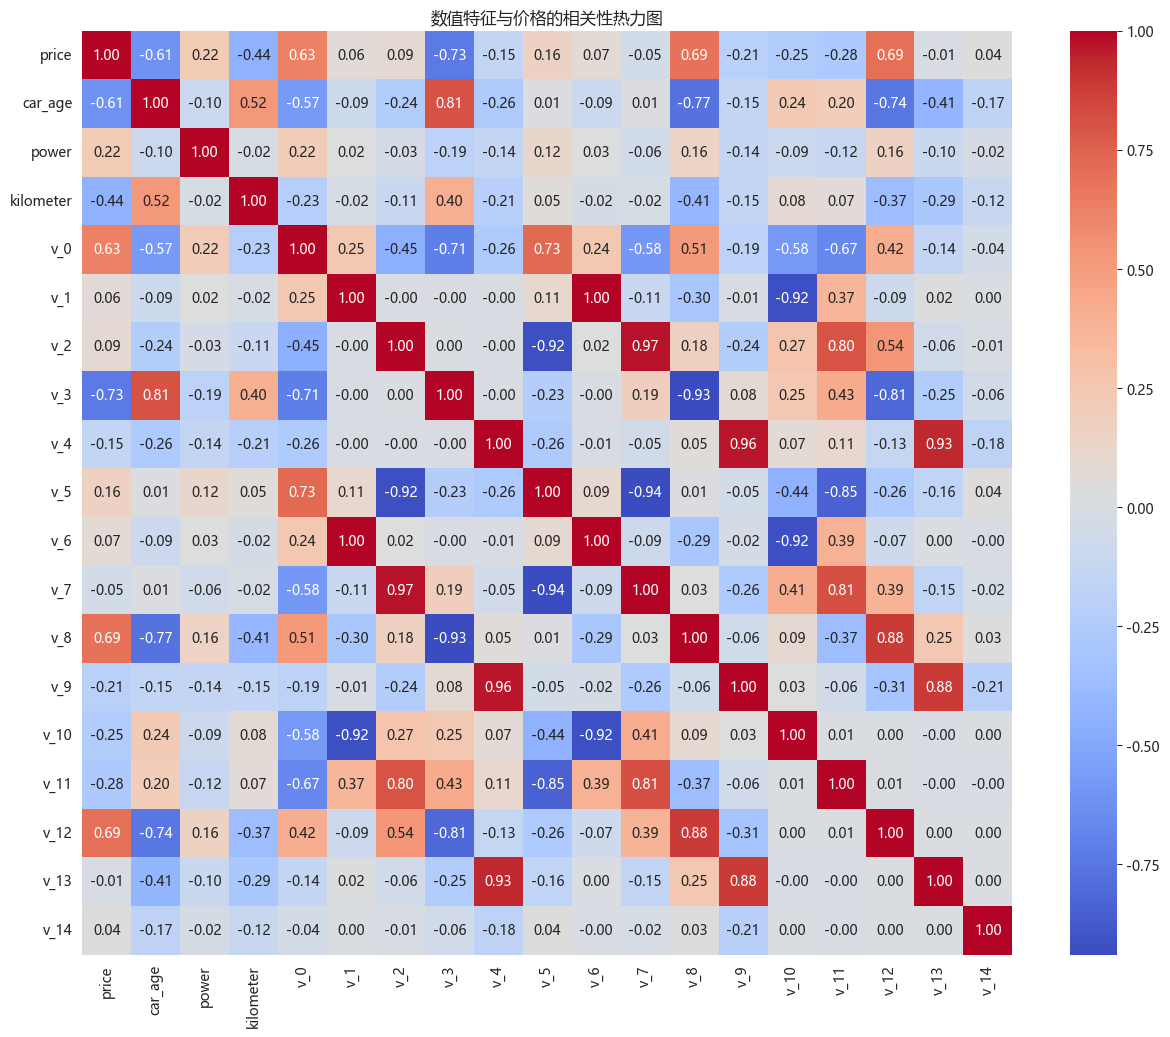

In [9]:
# --- 2. 绘制热力图 ---
plt.figure(figsize=(15, 12)) # 创建一个更大的画布来容纳热力图
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
# annot=True: 在格子上显示数值
# cmap='cool warm': 使用冷暖色调，红色代表正相关，蓝色代表负相关
# fmt='.2f': 数值保留两位小数
plt.title('数值特征与价格的相关性热力图')
plt.show()


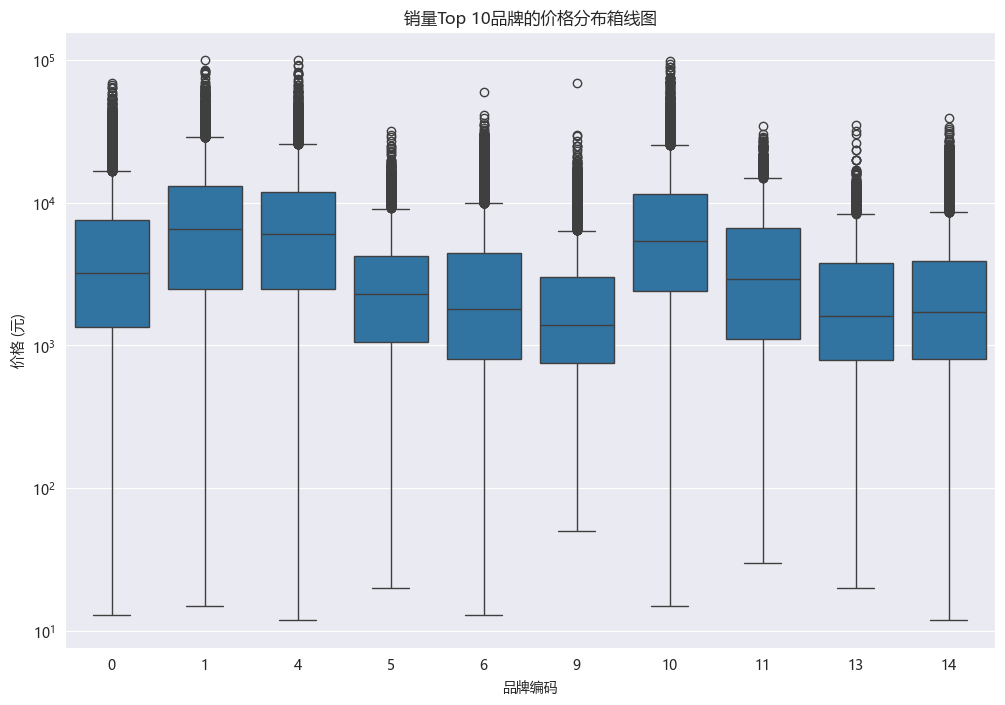

In [10]:
# TODO 2.分类特征与价格的关系
# --- 1. 品牌(brand) vs 价格(price) ---
# 由于品牌太多，我们只看销量前10的品牌
top10_brands = df['brand'].value_counts().nlargest(10).index
df_top10 = df[df['brand'].isin(top10_brands)]

plt.figure(figsize=(12, 8))
# 使用箱线图，x轴是品牌，y轴是价格
# 由于价格差异大，我们对y轴取对数，看得更清楚
sns.boxplot(x='brand', y='price', data=df_top10)
plt.title('销量Top 10品牌的价格分布箱线图')
plt.xlabel('品牌编码')
plt.ylabel('价格 (元)')
plt.yscale('log') # y轴使用对数刻度
plt.show()


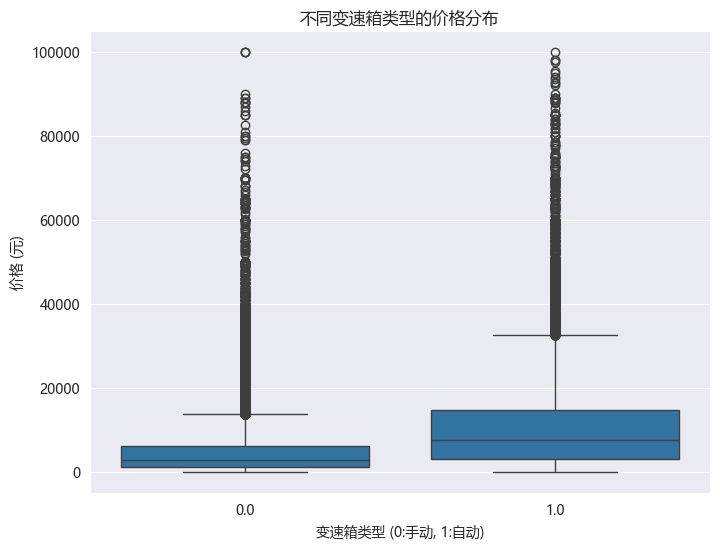

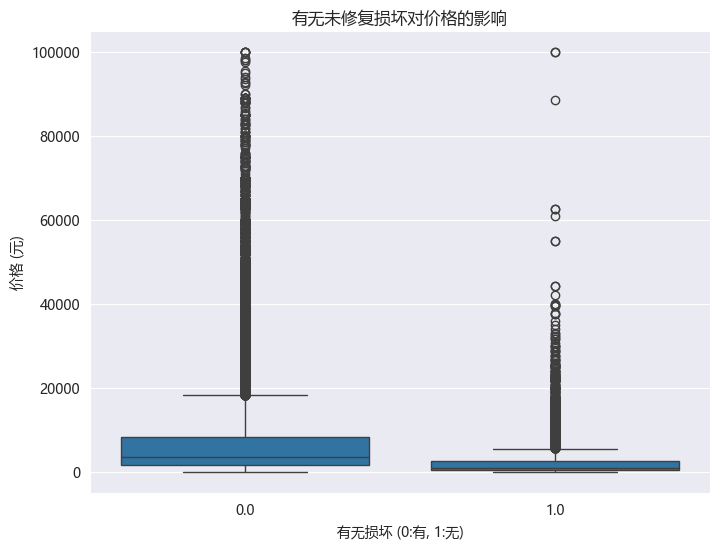

In [12]:
# --- 2. 变速箱(gearbox) vs 价格(price) ---
plt.figure(figsize=(8, 6))
sns.boxplot(x='gearbox', y='price', data=df)
plt.title('不同变速箱类型的价格分布')
plt.xlabel('变速箱类型 (0:手动, 1:自动)')
plt.ylabel('价格 (元)')
plt.show()

# --- 3. 有无损坏(notRepairedDamage) vs 价格(price) ---
# 这个特征的值可能是字符串'0.0', '1.0', '-', 我们需要先统一处理
df['notRepairedDamage'] = df['notRepairedDamage'].replace('-', '0.0').astype(float)
plt.figure(figsize=(8, 6))
sns.boxplot(x='notRepairedDamage', y='price', data=df)
plt.title('有无未修复损坏对价格的影响')
plt.xlabel('有无损坏 (0:有, 1:无)')
plt.ylabel('价格 (元)')
plt.show()
